# This notebook plots the distribution of Cenozoic porphyry copper deposits and associated ages. Data is from Yanites&Kesler2015

# https://www.nature.com/articles/ngeo2429#MOESM587
#### This notebook can be run in the docker container https://github.sydney.edu.au/EarthByte/EarthByteWorkflows/tree/master/RiftSubsidence

In [1]:
%matplotlib inline
import cartopy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as mticker
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
from shapely.geometry.polygon import LinearRing

import Utils, pygplates

In [2]:
import pandas as pd
df=pd.read_csv('/workspace/Documents/GRANTS/LP2021/Yanites_Cu_data.csv', sep=',',header=0)

In [3]:
rotation_files = ['Matthews_etal_GPC_2016_410-0Ma_GK07.rot']
topology_files = ['Matthews_etal_GPC_2016_MesozoicCenozoic_PlateTopologies.gpmlz',
                  'Matthews_etal_GPC_2016_Paleozoic_PlateTopologies.gpmlz',
                  'Matthews_etal_GPC_2016_TopologyBuildingBlocks.gpmlz']
coastlines_file = 'Matthews_etal_GPC_2016_Coastlines.gpmlz'
continent_polygons_file = 'Matthews_etal_GPC_2016_ContinentalPolygons.gpmlz'

time=0

print(f"reconstructing at {time} Ma...")

resolved_topologies = []
shared_boundary_sections = []
#use pygplates to resolve the topologies
pygplates.resolve_topologies(topology_files, rotation_files, resolved_topologies, time, 
                             shared_boundary_sections)
#coastlines
reconstructed_geometries = []
pygplates.reconstruct(
                coastlines_file, 
                rotation_files, 
                reconstructed_geometries, 
                time, 0)
#continent polygons
reconstructed_continents = []
pygplates.reconstruct(
                continent_polygons_file, 
                rotation_files, 
                reconstructed_continents, 
                time, 0)
#subduction zones
subduction_geoms=[]
Utils.get_subduction_geometries(subduction_geoms, shared_boundary_sections)


reconstructing at 0 Ma...


In [4]:
#Clasifying age data for plots(One day I'll learn how to make this efficient)
c1= np.argwhere(np.array(df.Age_Ma<=1.5))
c2=np.argwhere(np.array(df.Age_Ma>1.5)&np.array(df.Age_Ma<=3))
c3=np.argwhere(np.array(df.Age_Ma>3)&np.array(df.Age_Ma<=6))
c4=np.argwhere(np.array(df.Age_Ma>6)&np.array(df.Age_Ma<=9))
c5=np.argwhere(np.array(df.Age_Ma>9)&np.array(df.Age_Ma<=12))
c6=np.argwhere(np.array(df.Age_Ma>12)&np.array(df.Age_Ma<=15))
c7=np.argwhere(np.array(df.Age_Ma>15)&np.array(df.Age_Ma<=20))
c8=np.argwhere(np.array(df.Age_Ma>20)&np.array(df.Age_Ma<=25))
c9=np.argwhere(np.array(df.Age_Ma>25)&np.array(df.Age_Ma<=30))
c10=np.argwhere(np.array(df.Age_Ma>30)&np.array(df.Age_Ma<=35))
c11=np.argwhere(np.array(df.Age_Ma>35)&np.array(df.Age_Ma<=55))
c12=np.argwhere(np.array(df.Age_Ma>55)&np.array(df.Age_Ma<=65))

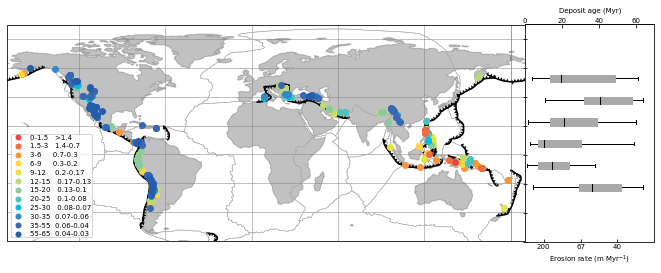

In [5]:
#Formatting 
plt.rcParams['pdf.fonttype'] = 42 ; # pdf.fonttype : 42 # Output Type 3 (Type3) or Type 42 (TrueType)
plt.rcParams['font.size'] = 7
ms=5

# fig = plt.figure(figsize=(14.5/2.5,5/2.5),tight_layout=0)
fig = plt.figure(figsize=(29/2.5,10/2.5),tight_layout=0)

#####
#Map#
#####
ax1=plt.subplot2grid((1,5),(0,0), rowspan=1,colspan=4,  projection=ccrs.PlateCarree(central_longitude=10))
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
              linewidth=1, color='gray', alpha=0.5, linestyle='-')

#present-day coastline
ax1.add_feature(cartopy.feature.LAND, color=(.4,.4,.4,.4))


#plot topological plates boundaries
for t in resolved_topologies:
    lat, lon =zip(*(t.get_resolved_boundary().to_lat_lon_list()))
    plt.plot(lon, lat,
         color='darkgrey', linewidth=.5, #the topological plates boundaries
         transform=ccrs.Geodetic(),
    )
    
#plot subduction zones
for geom, aspect in subduction_geoms:
    lat, lon =zip(*(geom.to_lat_lon_list()))
    plt.plot(lon, lat,
         color='black', linewidth=1.5, #the subduction zones in blue
         transform=ccrs.Geodetic(),
    )
    teeth = Utils.get_subduction_teeth(lon, lat, triangle_aspect=aspect, triangle_base_length=2)
    for tooth in teeth:
        ring = LinearRing(tooth)
        ax1.add_geometries([ring], ccrs.PlateCarree(), facecolor='black', edgecolor=None, alpha=1)
#defining the colors for plot        
cc1='#EF4440'; cc2='#F26B3A'; cc3='#F8973A'; cc4='#FFD73C'; cc5='#E5E63A';cc6='#BDD972';cc7='#88CB9D';cc8='#4AC2C5'; 
cc9='#00BCE4';cc10='#3189C9';cc11='#3968B2';cc12='#245DAA'
#Clasifying data
for i in c1:
    plt.plot(df.Long[i],df.Lat[i], 'o', color=cc1, label='0-1.5',transform=ccrs.Geodetic() , zorder=12)
for i in c2:
    plt.plot(df.Long[i],df.Lat[i], 'o', color=cc2, label='1.5-3',transform=ccrs.Geodetic() , zorder=12)
for i in c3:
    plt.plot(df.Long[i],df.Lat[i], 'o', color=cc3, label='3-6',transform=ccrs.Geodetic() )
for i in c4:
    plt.plot(df.Long[i],df.Lat[i], 'o', color=cc4, label= '6-9',transform=ccrs.Geodetic() )
for i in c5:
    plt.plot(df.Long[i],df.Lat[i], 'o', color=cc5, label='9-12',transform=ccrs.Geodetic() )
for i in c6:
    plt.plot(df.Long[i],df.Lat[i], 'o', color=cc6, label='12-15',transform=ccrs.Geodetic() )
for i in c7:
    plt.plot(df.Long[i],df.Lat[i], 'o', color=cc7, label='15-20',transform=ccrs.Geodetic() )
for i in c8:
    plt.plot(df.Long[i],df.Lat[i], 'o', color=cc8, label='20-25',transform=ccrs.Geodetic() )
for i in c9:
    plt.plot(df.Long[i],df.Lat[i], 'o', color=cc9, label='25-30',transform=ccrs.Geodetic() )
for i in c10:
    plt.plot(df.Long[i],df.Lat[i], 'o', color=cc10, label='30-35',transform=ccrs.Geodetic() )
for i in c11:
    plt.plot(df.Long[i],df.Lat[i], 'o', color=cc11, label='35-55',transform=ccrs.Geodetic() )
for i in c12:
    plt.plot(df.Long[i],df.Lat[i], 'o', color=cc12, label= '55-65',transform=ccrs.Geodetic() )
ax1.set_ylim(-60, 90)

#Legend
legend_elements=[Line2D([0], [0], marker='o', color=cc1, label='0-1.5   >1.4',markerfacecolor=cc1, markersize=ms,linestyle='None'), 
                 Line2D([0], [0], marker='o', color=cc2, label='1.5-3   1.4-0.7',markerfacecolor=cc2, markersize=ms,linestyle='None'),
                 Line2D([0], [0], marker='o', color=cc3, label='3-6     0.7-0.3',markerfacecolor=cc3, markersize=ms,linestyle='None'),
                 Line2D([0], [0], marker='o', color=cc4, label='6-9     0.3-0.2',markerfacecolor=cc4, markersize=ms,linestyle='None'),
                 Line2D([0], [0], marker='o', color=cc5, label='9-12    0.2-0.17',markerfacecolor=cc5, markersize=ms,linestyle='None'),
                 Line2D([0], [0], marker='o', color=cc6, label='12-15   0.17-0.13',markerfacecolor=cc6, markersize=ms,linestyle='None'),
                 Line2D([0], [0], marker='o', color=cc7, label='15-20   0.13-0.1',markerfacecolor=cc7, markersize=ms,linestyle='None'),
                 Line2D([0], [0], marker='o', color=cc8, label='20-25   0.1-0.08',markerfacecolor=cc8, markersize=ms,linestyle='None'),
                 Line2D([0], [0], marker='o', color=cc9, label='25-30   0.08-0.07',markerfacecolor=cc9, markersize=ms,linestyle='None'),
                 Line2D([0], [0], marker='o', color=cc10, label='30-35  0.07-0.06',markerfacecolor=cc10, markersize=ms,linestyle='None'),
                 Line2D([0], [0], marker='o', color=cc11, label='35-55  0.06-0.04',markerfacecolor=cc11, markersize=ms,linestyle='None'),
                 Line2D([0], [0], marker='o', color=cc12, label='55-65  0.04-0.03',markerfacecolor=cc12, markersize=ms,linestyle='None')]

ax1.legend(handles=legend_elements, loc='lower left', labelspacing=0.4, borderpad=0)    


#########
#Boxplot#
#########
ax2=plt.subplot2grid((1,5),(0,4), rowspan=1,colspan=1, sharey=ax1)

c='darkgrey'
ax2.boxplot((df.Age_Ma[np.array(df.Lat>45)&np.array(df.Lat<=60)],
             df.Age_Ma[np.array(df.Lat>30)&np.array(df.Lat<=45)],
            df.Age_Ma[np.array(df.Lat>15)&np.array(df.Lat<=30)],
            df.Age_Ma[np.array(df.Lat>0)&np.array(df.Lat<=15)],
            df.Age_Ma[np.array(df.Lat>-15)&np.array(df.Lat<=0)],
            df.Age_Ma[np.array(df.Lat>-30)&np.array(df.Lat<=-15)]),
            vert=False, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color='k'),
            whiskerprops=dict(color='k'),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='k'),
            positions=[52.5, 37.5, 22.5, 7.5, -7.5, -22.5], widths = 5)
ax2.set_ylim(-60, 90)
ax2.set_xlim(0,70)

ax2.set_xlabel('Erosion rate (m Myr$^{-1}$)')
ax2.set_title('Deposit age (Myr)', fontsize=7)
ax2_t = ax2.secondary_xaxis('top')
ax2_t.tick_params(axis='x', direction='in', pad=0)
ax2.tick_params(axis='x', direction='in', pad=2)
plt.xticks([10,30,50], [200,67,40])
plt.yticks([-60,-40,-20,0, 20, 40,60,80], [])
ax2.tick_params(axis='y', direction='inout')
#plt.tight_layout()#error zero-size array to reduction operation minimum which has no identity
#fig.tight_layout()#ValueError: zero-size array to reduction operation minimum which has no identity
#fig.tight_layout(rect=[0, 0, 0, 0])#ValueError: zero-size array to reduction operation minimum which has no identity
#plt.close('all')# don't know what it actually does
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)
fig.savefig('/workspace/Documents/GRANTS/LP2021/porphyry_copper_deposits.pdf', dpi=300)


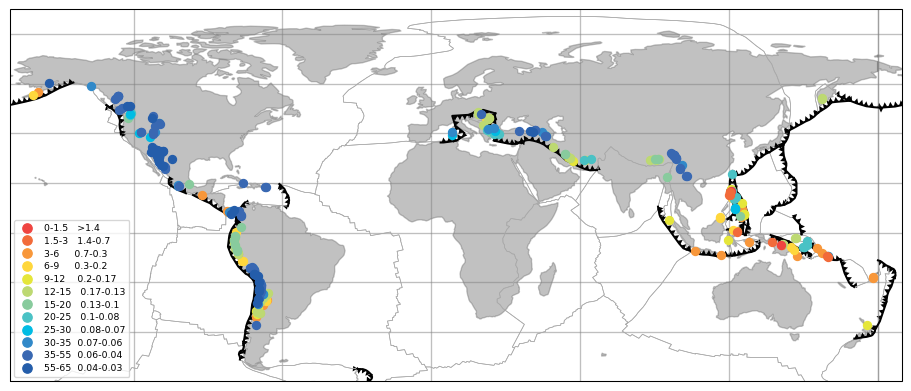

In [6]:
#Just the map
plt.rcParams['pdf.fonttype'] = 42 
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size'] = 7


# plot the map
fig = plt.figure(figsize=(12,8),dpi=96)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=10))
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
              linewidth=1, color='gray', alpha=0.5, linestyle='-')
#gl.xlabels_top = False
#gl.ylabels_right = False
# gl.xlocator = mticker.FixedLocator(range(-180,180,30))
# gl.ylocator = mticker.FixedLocator(range(-90,90,15))
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# gl.xlabel_style = {'color': 'gray', 'weight': 'bold'}
# gl.ylabel_style = {'color': 'gray', 'weight': 'bold'}

#present-day coastline
ax.add_feature(cartopy.feature.LAND, color=(.4,.4,.4,.4))


#plot topological plates boundaries
for t in resolved_topologies:
    lat, lon =zip(*(t.get_resolved_boundary().to_lat_lon_list()))
    plt.plot(lon, lat,
         color='darkgrey', linewidth=.5, #the topological plates boundaries
         transform=ccrs.Geodetic(),
    )
    
#plot subduction zones
for geom, aspect in subduction_geoms:
    lat, lon =zip(*(geom.to_lat_lon_list()))
    plt.plot(lon, lat,
         color='black', linewidth=1.5, #the subduction zones in blue
         transform=ccrs.Geodetic(),
    )
    teeth = Utils.get_subduction_teeth(lon, lat, triangle_aspect=aspect, triangle_base_length=2)
    for tooth in teeth:
        ring = LinearRing(tooth)
        ax.add_geometries([ring], ccrs.PlateCarree(), facecolor='black', edgecolor=None, alpha=1)

#Ploting the age and location of ore deposits
##With a given colormap without clasiffying the data
# cmap = plt.cm.jet
# # extract all colors from the .jet map
# cmaplist = [cmap(i) for i in range(len(df.Age_Ma))]
# for i in np.arange(0,len(df.Age_Ma),1):
#     plt.plot(df.Long[i],df.Lat[i],'o',c=cmaplist[i], label=df.Age_Ma[i],transform=ccrs.Geodetic() )
cc1='#EF4440'
cc2='#F26B3A'
cc3='#F8973A'
cc4='#FFD73C'
cc5='#E5E63A'
cc6='#BDD972'
cc7='#88CB9D'
cc8='#4AC2C5'
cc9='#00BCE4'
cc10='#3189C9'
cc11='#3968B2'
cc12='#245DAA'


##Clasified data
for i in c1:
    plt.plot(df.Long[i],df.Lat[i], 'o', color=cc1, label='0-1.5',transform=ccrs.Geodetic() , zorder=12)
for i in c2:
    plt.plot(df.Long[i],df.Lat[i], 'o', color=cc2, label='1.5-3',transform=ccrs.Geodetic() , zorder=12)
for i in c3:
    plt.plot(df.Long[i],df.Lat[i], 'o', color=cc3, label='3-6',transform=ccrs.Geodetic() )
for i in c4:
    plt.plot(df.Long[i],df.Lat[i], 'o', color=cc4, label= '6-9',transform=ccrs.Geodetic() )
for i in c5:
    plt.plot(df.Long[i],df.Lat[i], 'o', color=cc5, label='9-12',transform=ccrs.Geodetic() )
for i in c6:
    plt.plot(df.Long[i],df.Lat[i], 'o', color=cc6, label='12-15',transform=ccrs.Geodetic() )
for i in c7:
    plt.plot(df.Long[i],df.Lat[i], 'o', color=cc7, label='15-20',transform=ccrs.Geodetic() )
for i in c8:
    plt.plot(df.Long[i],df.Lat[i], 'o', color=cc8, label='20-25',transform=ccrs.Geodetic() )
for i in c9:
    plt.plot(df.Long[i],df.Lat[i], 'o', color=cc9, label='25-30',transform=ccrs.Geodetic() )
for i in c10:
    plt.plot(df.Long[i],df.Lat[i], 'o', color=cc10, label='30-35',transform=ccrs.Geodetic() )
for i in c11:
    plt.plot(df.Long[i],df.Lat[i], 'o', color=cc11, label='35-55',transform=ccrs.Geodetic() )
for i in c12:
    plt.plot(df.Long[i],df.Lat[i], 'o', color=cc12, label= '55-65',transform=ccrs.Geodetic() )
plt.ylim(-60, 90)
legend_elements=[Line2D([0], [0], marker='o', color=cc1, label='0-1.5   >1.4',markerfacecolor=cc1, markersize=7,linestyle='None'), 
                 Line2D([0], [0], marker='o', color=cc2, label='1.5-3   1.4-0.7',markerfacecolor=cc2, markersize=7,linestyle='None'),
                 Line2D([0], [0], marker='o', color=cc3, label='3-6     0.7-0.3',markerfacecolor=cc3, markersize=7,linestyle='None'),
                 Line2D([0], [0], marker='o', color=cc4, label='6-9     0.3-0.2',markerfacecolor=cc4, markersize=7,linestyle='None'),
                 Line2D([0], [0], marker='o', color=cc5, label='9-12    0.2-0.17',markerfacecolor=cc5, markersize=7,linestyle='None'),
                 Line2D([0], [0], marker='o', color=cc6, label='12-15   0.17-0.13',markerfacecolor=cc6, markersize=7,linestyle='None'),
                 Line2D([0], [0], marker='o', color=cc7, label='15-20   0.13-0.1',markerfacecolor=cc7, markersize=7,linestyle='None'),
                 Line2D([0], [0], marker='o', color=cc8, label='20-25   0.1-0.08',markerfacecolor=cc8, markersize=7,linestyle='None'),
                 Line2D([0], [0], marker='o', color=cc9, label='25-30   0.08-0.07',markerfacecolor=cc9, markersize=7,linestyle='None'),
                 Line2D([0], [0], marker='o', color=cc10, label='30-35  0.07-0.06',markerfacecolor=cc10, markersize=7,linestyle='None'),
                 Line2D([0], [0], marker='o', color=cc11, label='35-55  0.06-0.04',markerfacecolor=cc11, markersize=7,linestyle='None'),
                 Line2D([0], [0], marker='o', color=cc12, label='55-65  0.04-0.03',markerfacecolor=cc12, markersize=7,linestyle='None')]

ax.legend(handles=legend_elements, loc='lower left', labelspacing=0.4)    


fig.savefig('/workspace/Documents/GRANTS/LP2021/zones_map_0Ma.pdf', dpi=300, bbox_inches="tight")


In [ ]:
#Boxplot
fig = plt.figure(figsize=(8,2))
fig, ax = plt.subplots(1, 1)
# ax.xaxis.set_tick_params(labeltop='on')

c='darkgrey'
plt.boxplot((df.Age_Ma[np.array(df.Lat>45)&np.array(df.Lat<=60)],
             df.Age_Ma[np.array(df.Lat>30)&np.array(df.Lat<=45)],
            df.Age_Ma[np.array(df.Lat>15)&np.array(df.Lat<=30)],
            df.Age_Ma[np.array(df.Lat>0)&np.array(df.Lat<=15)],
            df.Age_Ma[np.array(df.Lat>-15)&np.array(df.Lat<=0)],
            df.Age_Ma[np.array(df.Lat>-30)&np.array(df.Lat<=-15)]),
            vert=False, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color='k'),
            whiskerprops=dict(color='k'),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='k'),
           positions=[52.5, 37.5, 22.5, 7.5, -7.5, -22.5], widths = 10)
plt.ylim(-90,90)
plt.xlabel('Deposit age (Myr)')
plt.rcParams["xtick.top"]
# plt.xticks([10,30,50], [200,67,40])

ax_t = ax.secondary_xaxis('top')
ax_t.tick_params(axis='x', direction='in', labeltop=None)
#plt.yticks([])# hide ticks and labels in the y axis

fig.savefig('/workspace/Documents/GRANTS/LP2021/Boxplot_ore_deposits.pdf', dpi=300, bbox_inches="tight")


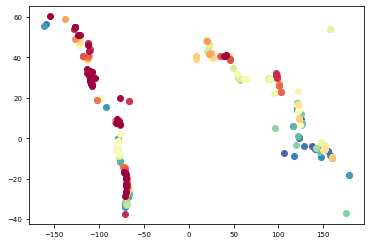

In [7]:
#Ploting the data sorted by age without clasifying it
# colour normalisation
import matplotlib.colors as mcolors
cmap = plt.cm.Spectral_r
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(len(df.Age_Ma))]


for i in np.arange(0,len(df.Age_Ma),1):
    plt.plot(df.Long[i],df.Lat[i],'o',c=cmaplist[i], label=df.Age_Ma[i] )
